# Import

In [6]:
## Imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from scipy.stats import pearsonr, spearmanr, mannwhitneyu, f_oneway
from os.path import exists
from importlib import reload

import wrangle
import warnings
warnings.filterwarnings("ignore")


# Wrangle

In [2]:
reload(wrangle)

<module 'wrangle' from '/Users/sinao/codeup-data-science/unemployment_project/wrangle.py'>

In [3]:
df = wrangle.prep_aug()

/Users/sinao/codeup-data-science/unemployment_project/wrangle.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[np.where(df.peafnow == 1)]['peafever'] = 1
/Users/sinao/codeup-data-science/unemployment_project/wrangle.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.pehrftpt == 1]['pehruslt'] = more_than_35
/Users/sinao/codeup-data-science/unemployment_project/wrangle.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

## Split dataframe

In [12]:
def split_scale(df):   
    #train_test_split
    train_validate, test = train_test_split(df, test_size=.2, random_state=514, stratify=df['employed'])
    train, validate = train_test_split(train_validate, test_size=.3, random_state=514, stratify=train_validate['employed'])
    
    #create scaler object
    scaler = MinMaxScaler()

    # create copies to hold scaled data
    train_scaled = train.copy(deep=True)
    validate_scaled = validate.copy(deep=True)
    test_scaled =  test.copy(deep=True)

    #create list of numeric columns for scaling
    num_cols = train.select_dtypes(include='number')

    #fit to data
    scaler.fit(num_cols)

    # apply
    train_scaled[num_cols.columns] = scaler.transform(train[num_cols.columns])
    validate_scaled[num_cols.columns] =  scaler.transform(validate[num_cols.columns])
    test_scaled =  scaler.transform(test[num_cols.columns])

    return train, validate, test, train_scaled, validate_scaled, test_scaled

In [13]:
train, validate, test, train_scaled, validate_scaled, test_scaled = split_scale(df)

# Explore 

## Univariate

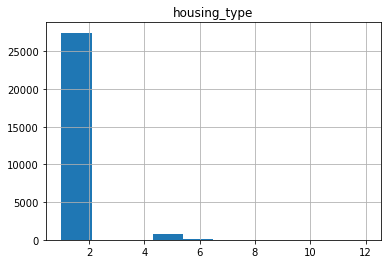

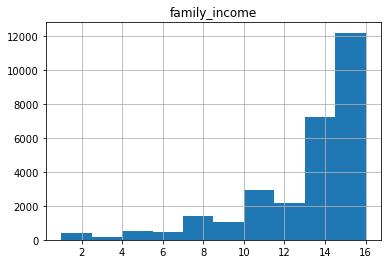

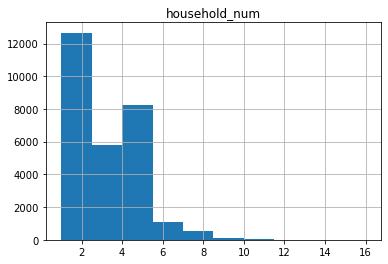

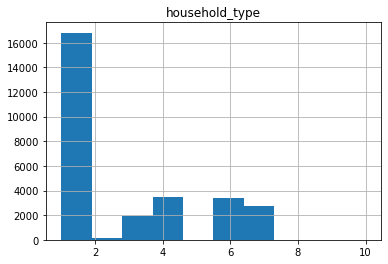

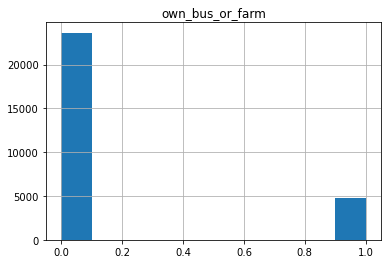

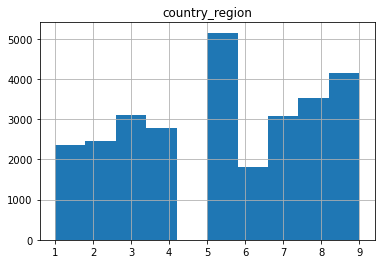

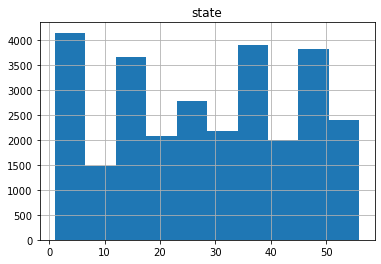

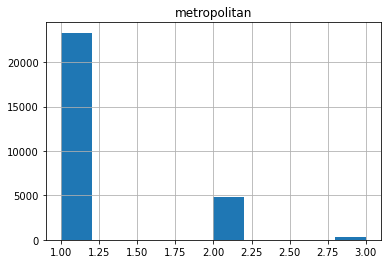

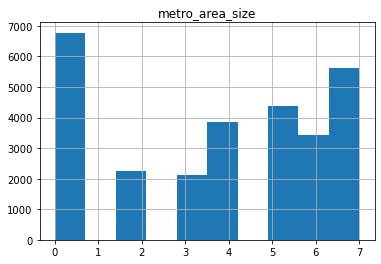

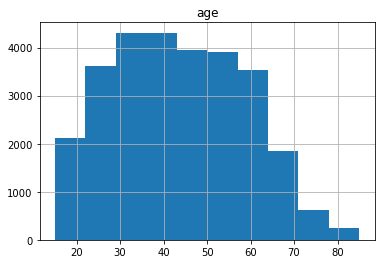

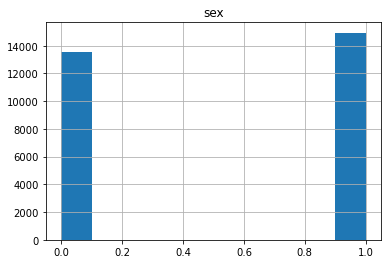

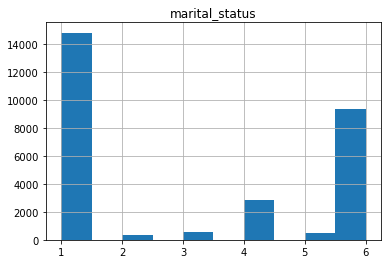

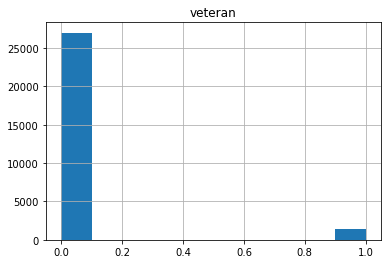

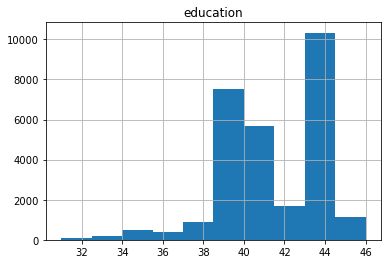

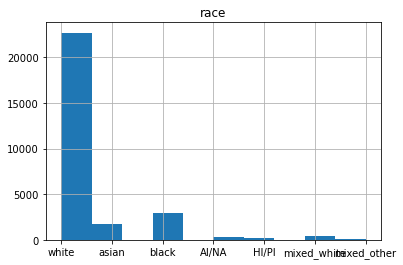

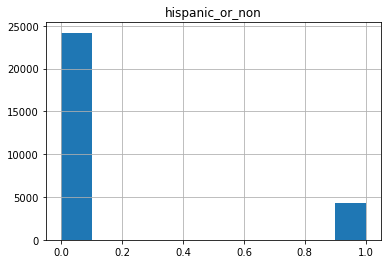

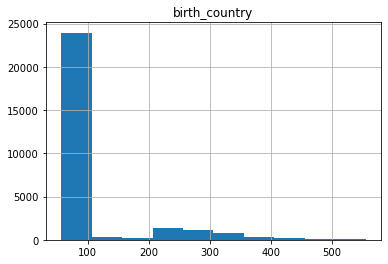

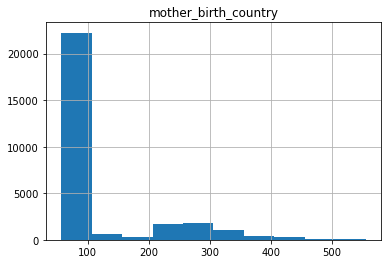

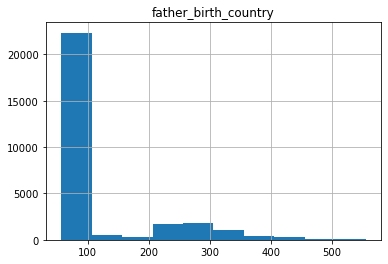

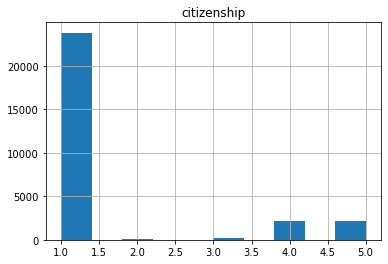

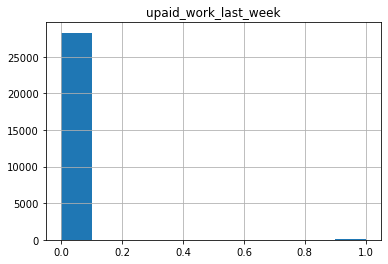

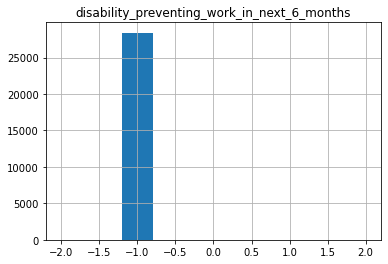

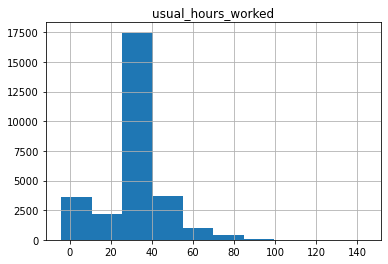

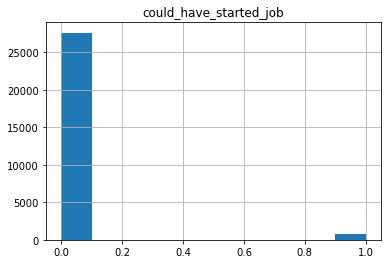

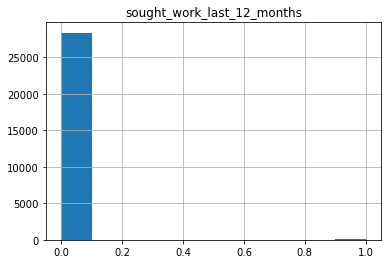

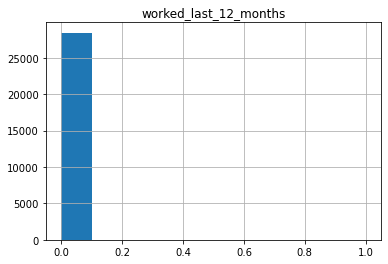

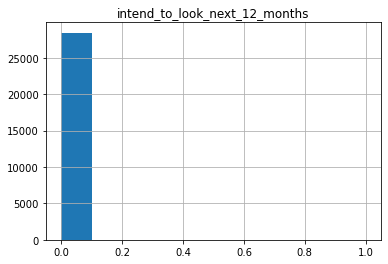

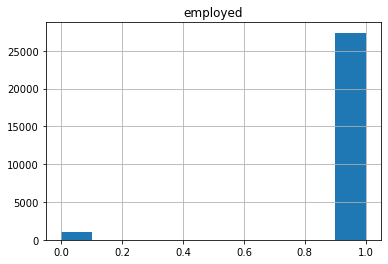

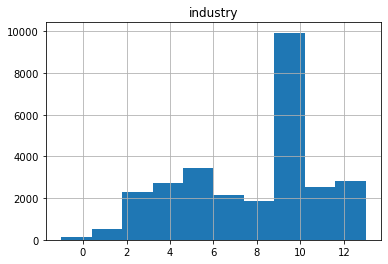

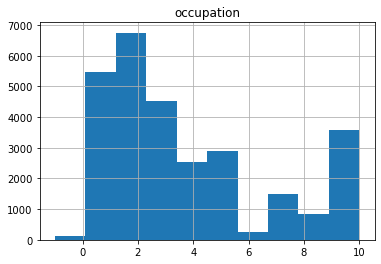

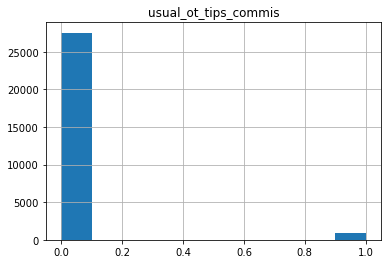

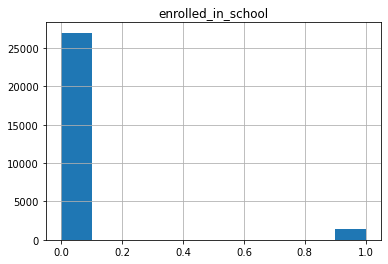

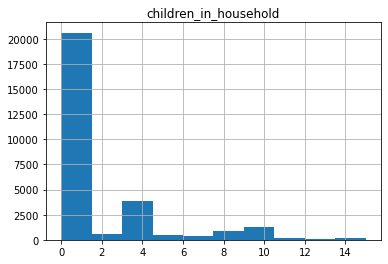

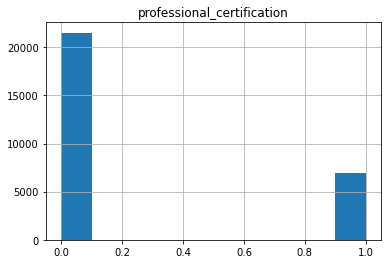

In [19]:
for col in train.columns:
    train[col].hist()
    plt.title(col)
    plt.show()

### Takeaways
* Skewed:
    - `family_income`, `household_num`, 'household_type`
* many responses from region 5 (south_atlantic)
* almost all respondents worked in last 12 months (train split)
* eliminate - `could_have_started_job`

## Bivariate - Pairplots 
* Examine variables in relationship to each other

In [25]:
# create column filter lists for plotting use

#fixing types on categorical columns
categorical_cols = ['housing_type','family_income','household_type',
                'country_region','state','metropolitan','metro_area_size',
                'marital_status','education','race','birth_country',
                'mother_birth_country','father_birth_country','citizenship',
                'industry','occupation']

binary_cols = ['own_bus_or_farm', 'sex', 'veteran','hispanic_or_non', 
        'upaid_work_last_week','could_have_started_job',
        'sought_work_last_12_months', 'worked_last_12_months',
        'intend_to_look_next_12_months','employed', 'usual_ot_tips_commis',
        'enrolled_in_school','professional_certification']  

continuous_cols = ['age', 'household_num', 'children_in_household'] 

In [23]:
def plot_continuous_pairs (df, col_list):
    """ 
    Purpose
        Plot pairwise relationships of zillow dataframe
        Ignores Categorical columns
    
    Parameters
        df: a dataframe containing zillow real estate data

    Returns
        None
    """

    #initialize a seaborn pairgrid
    g = sns.PairGrid(df[col_list])
    
    #fills out the pairgrid with a regplot
    g.map(sns.regplot, line_kws={'color':'r'})
    return 

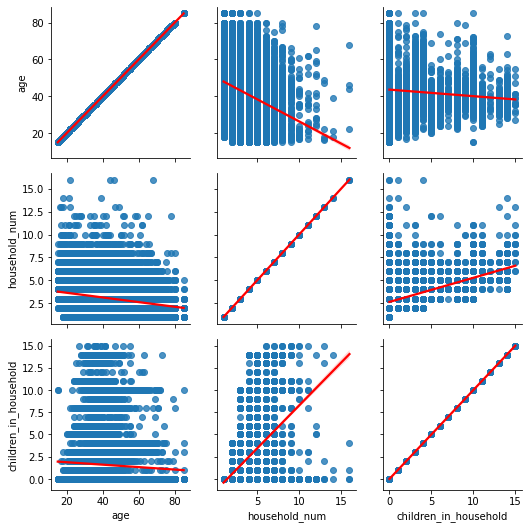

In [24]:
plot_continuous_pairs(train, continuous_col)

### Takeaways
- Increases in age track with decreases in home size

## Bivariate - Categorical Plotting

In [ ]:
def plot_cat_var_pairs(df, categorical_cols, continuous_cols):
    """ 
    Purpose
        Plot pairwise relationships of zillow dataframe utlizing sample size 1000
        Ignores Categorical columns

    Parameters
        df: a dataframe containing zillow real estate data

    Returns
    None
    """

    categorical_cols = df.select_dtypes(exclude='number')

    continuous_cols = df.select_dtypes(include='number')

    g = sns.PairGrid(data=df, 
                y_vars=continuous_cols,
                x_vars=categorical_cols, 
                height=4, 
                aspect=2)
    g.map(sns.swarmplot)

    g = sns.PairGrid(data=df, 
                y_vars=continuous_cols,
                x_vars='county', 
                height=4, 
                aspect=2)
    g.map(sns.boxplot)

    g = sns.PairGrid(data=df, 
                y_vars=continuous_cols,
                x_vars='decades', 
                height=4, 
                aspect=2)

    g.map(sns.barplot)
    
    return

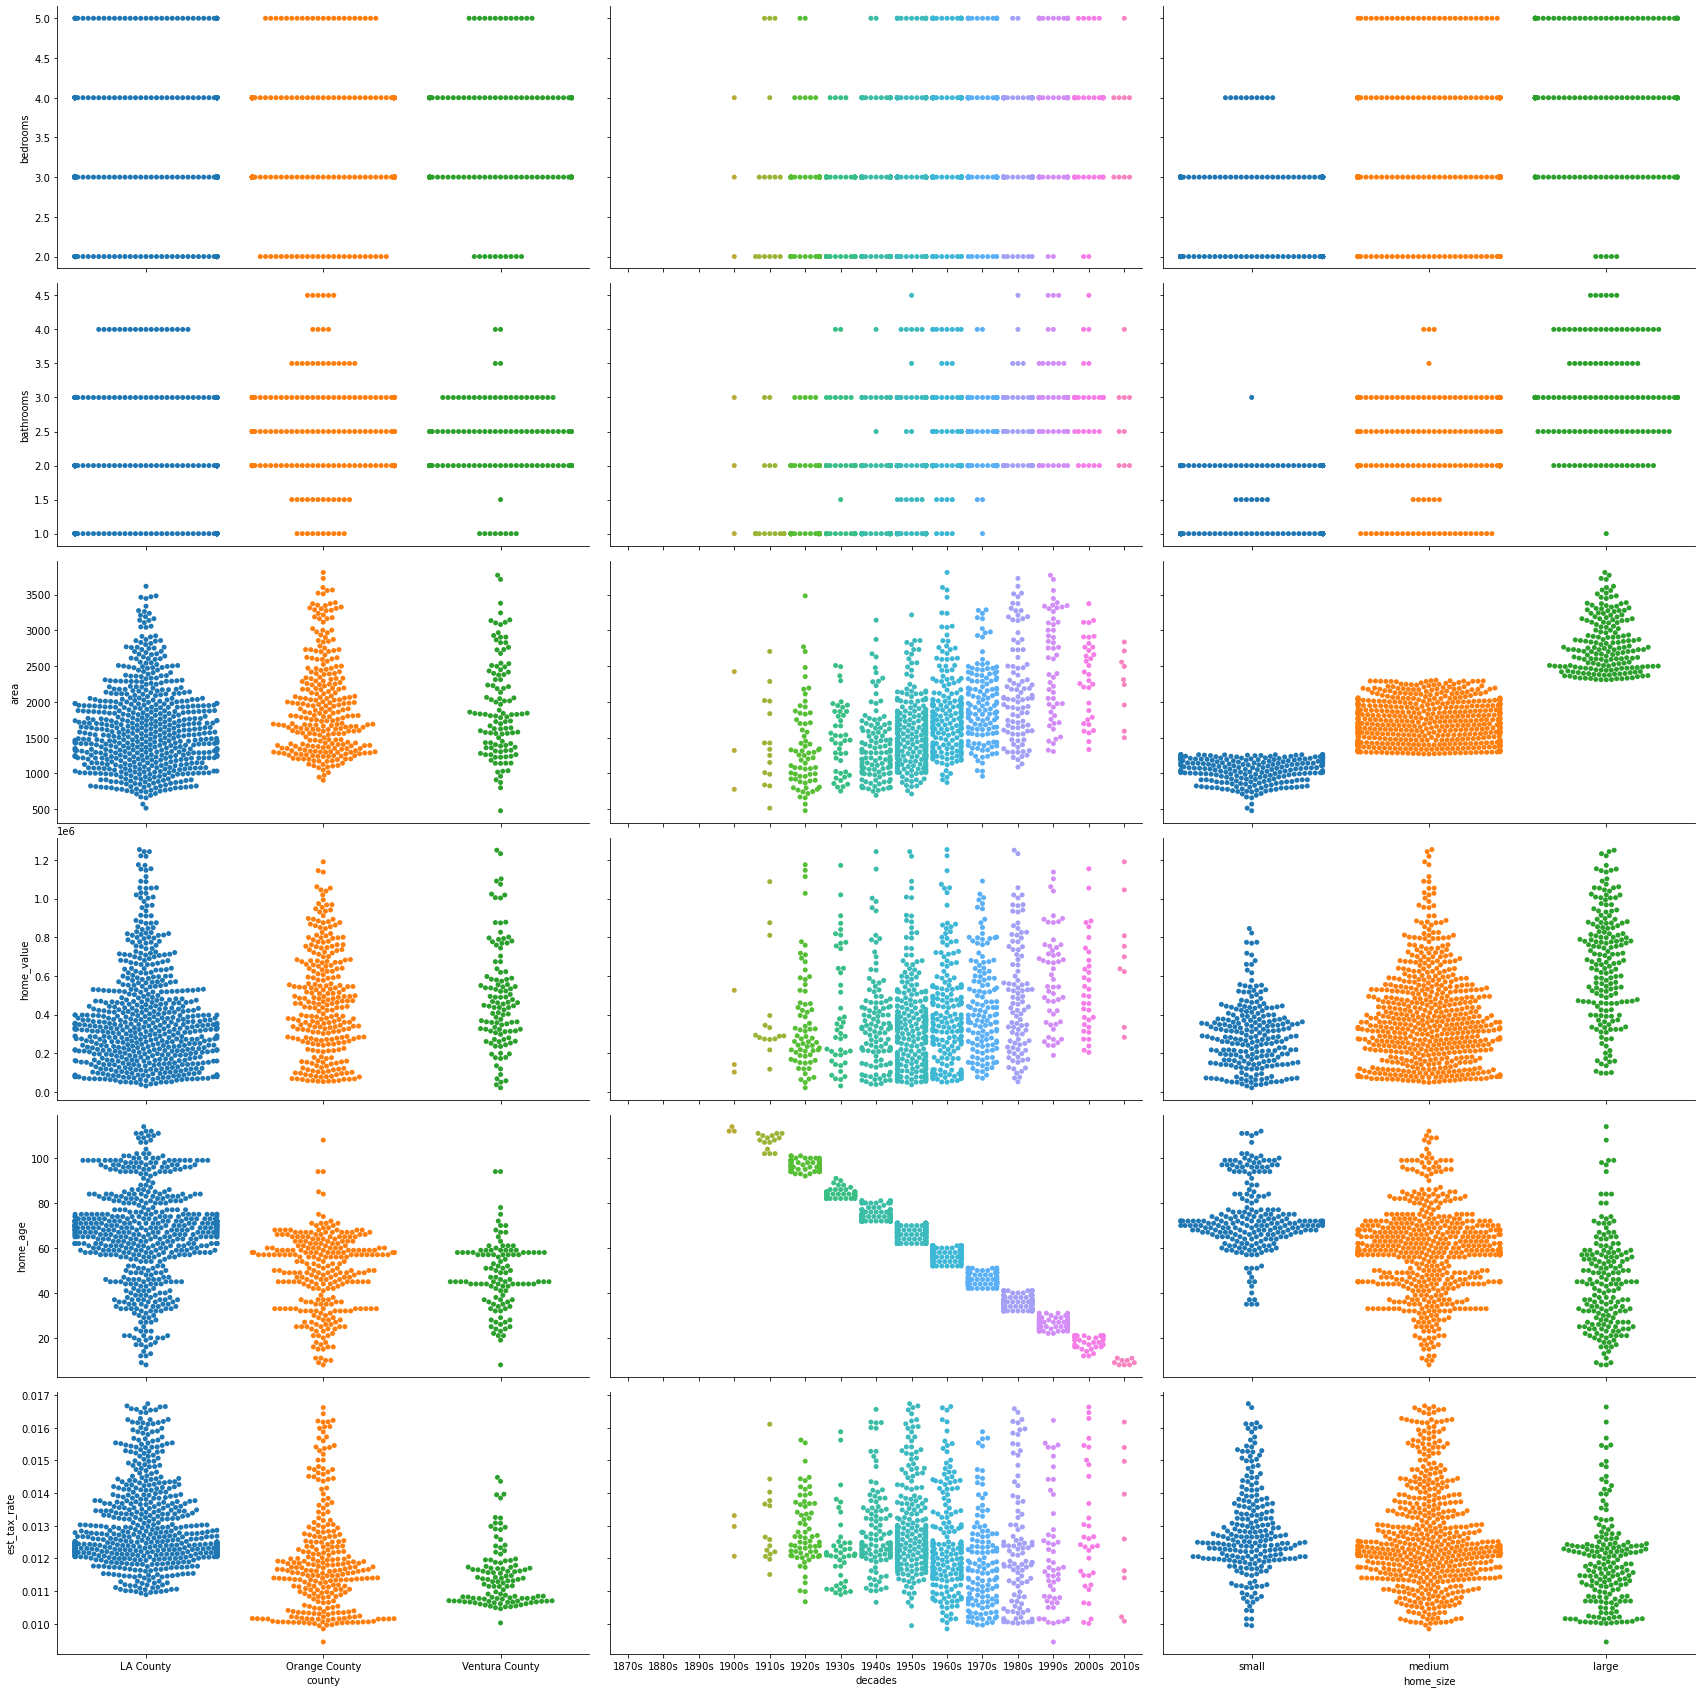

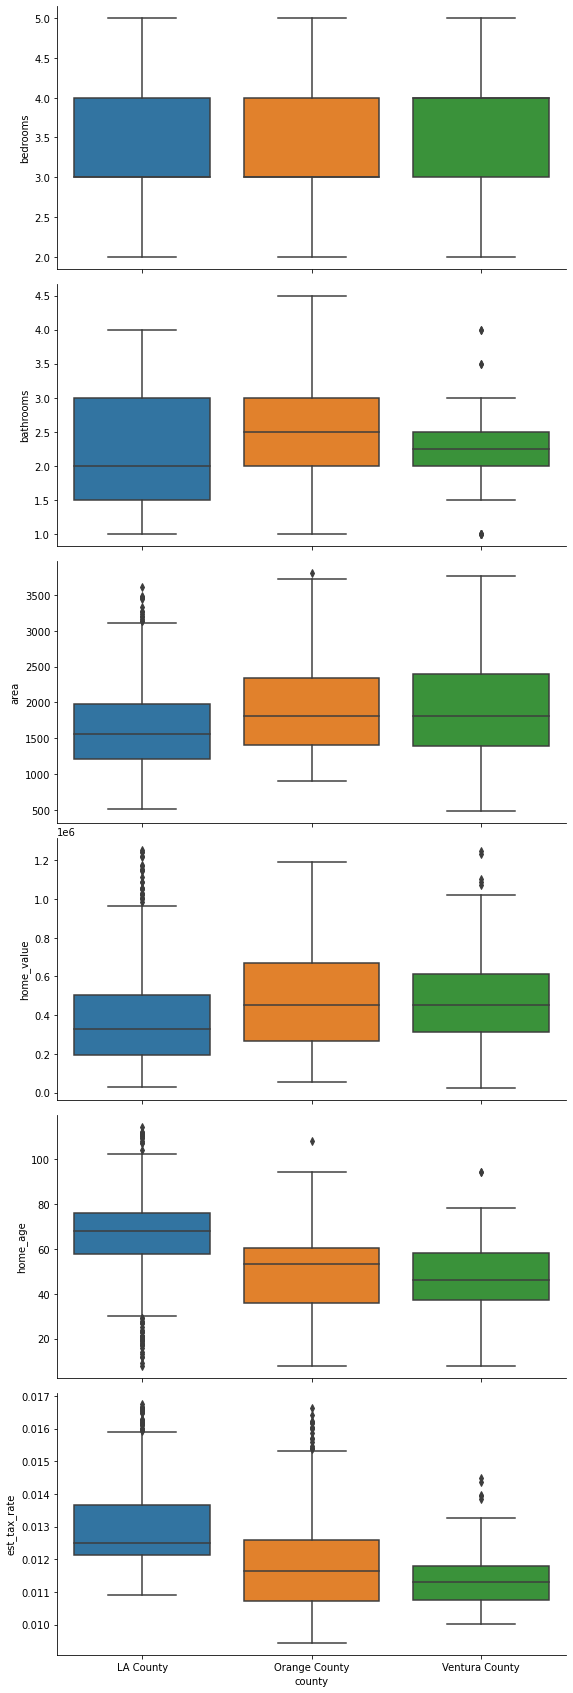

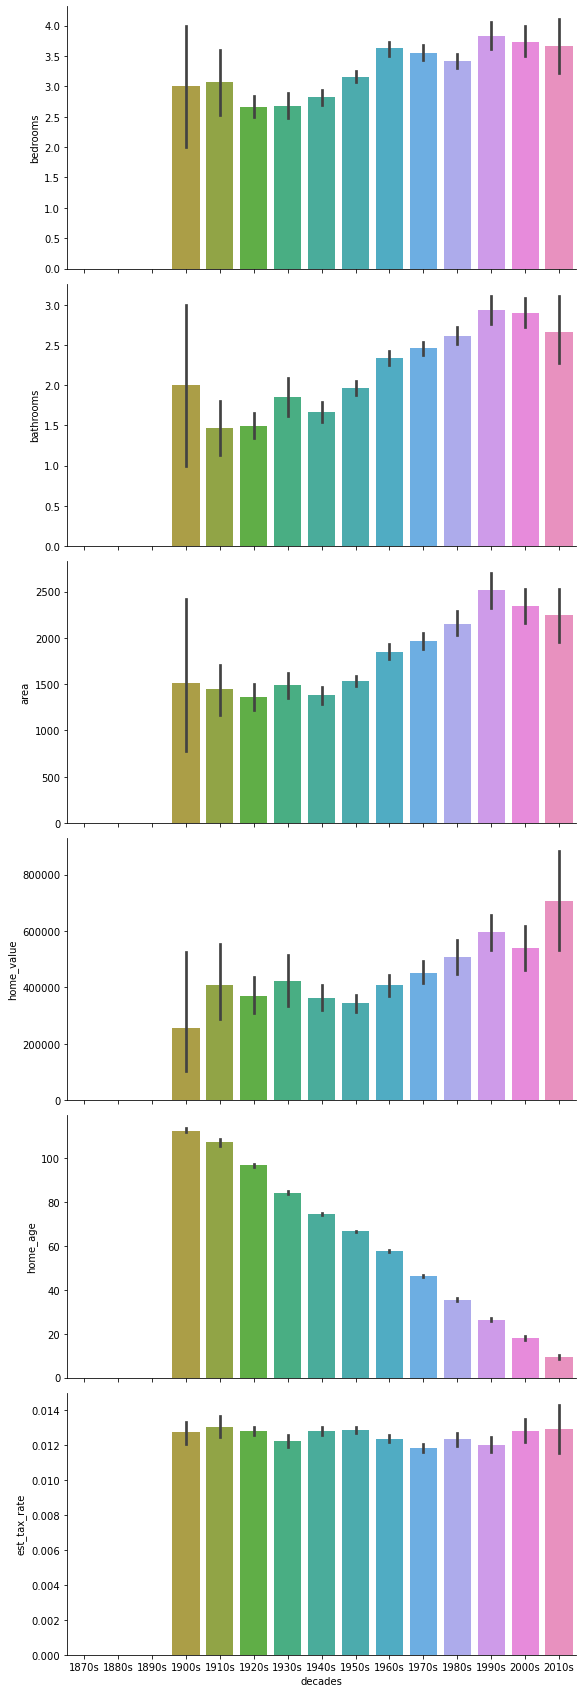

In [ ]:
plot_cat_var_pairs(train.sample(n=1000))

In [30]:
unemployed = train[train.employed == 0]

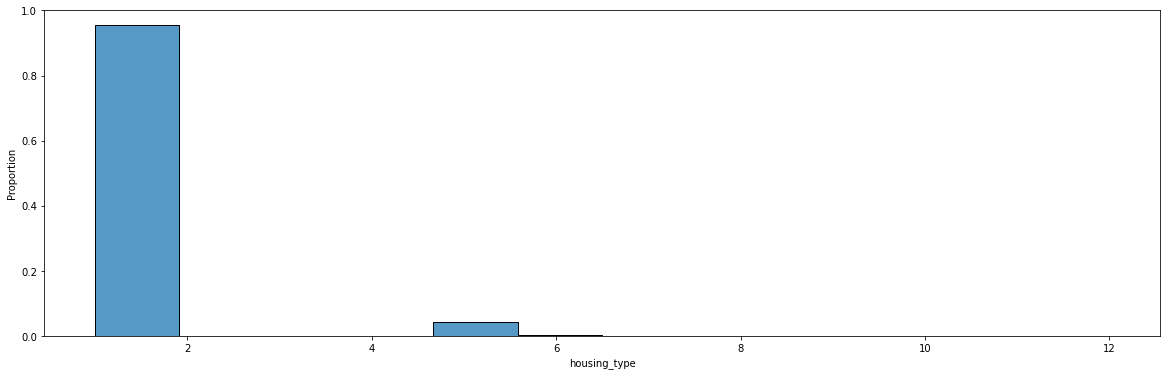

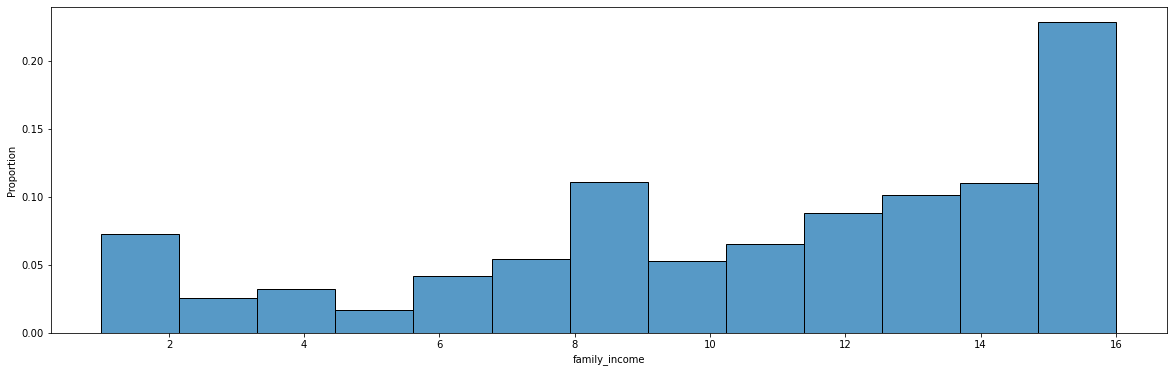

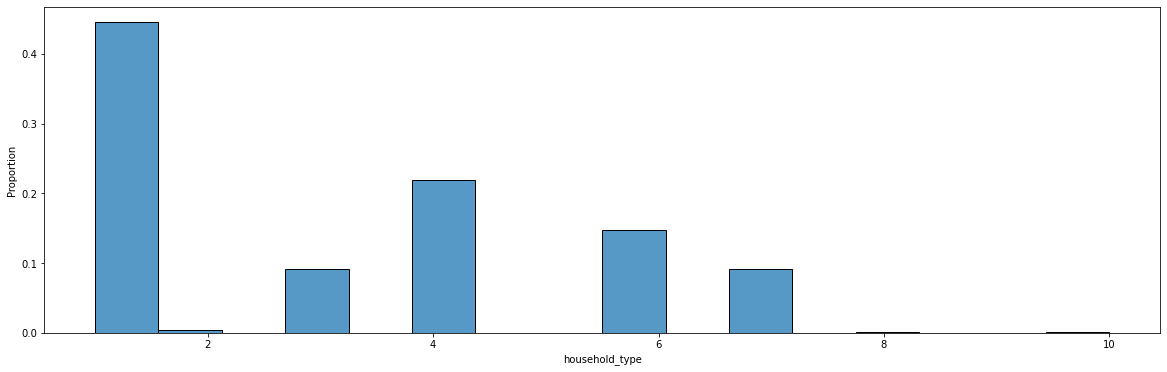

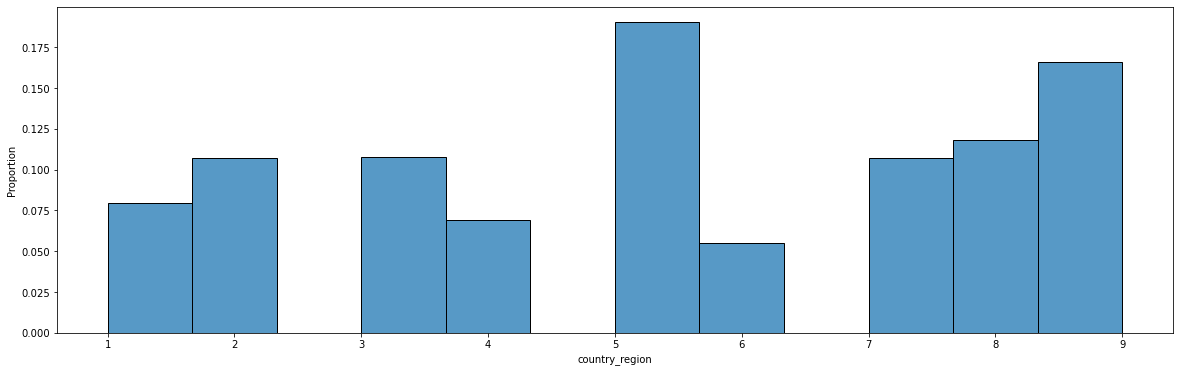

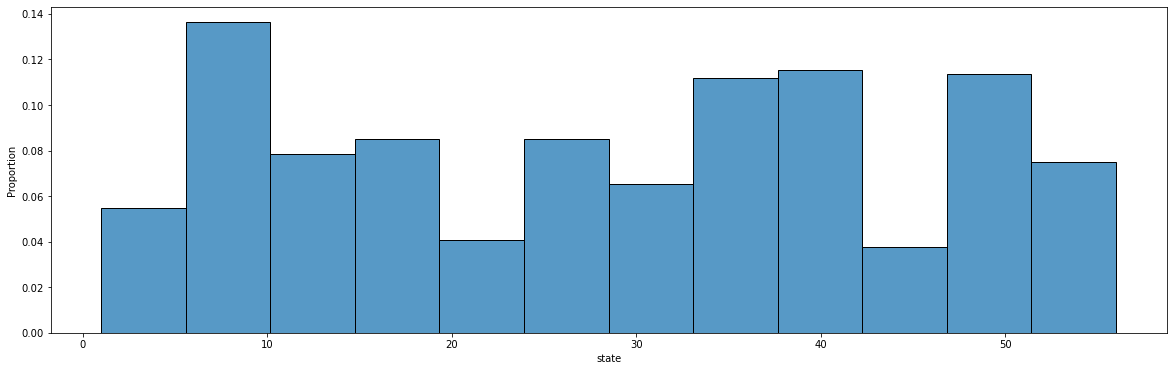

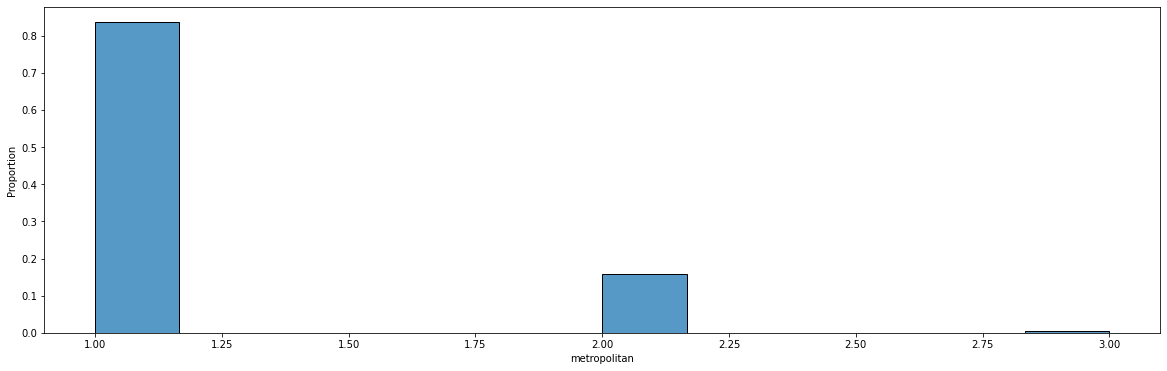

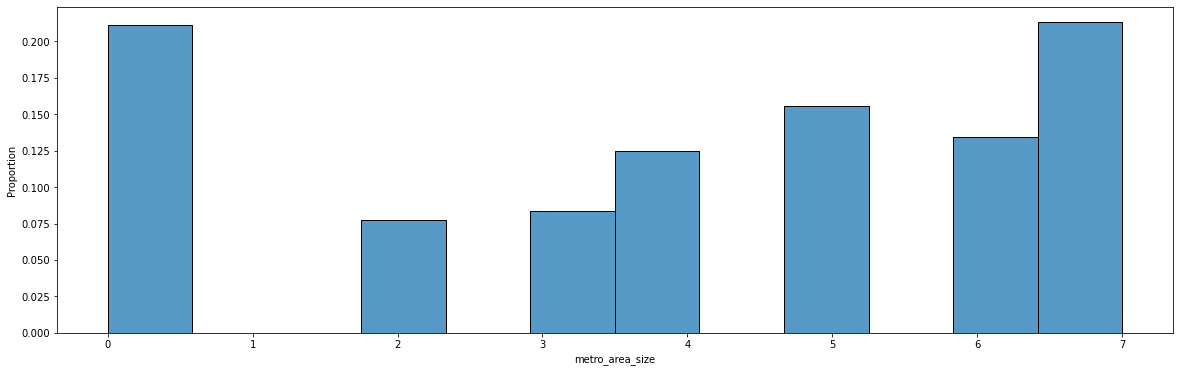

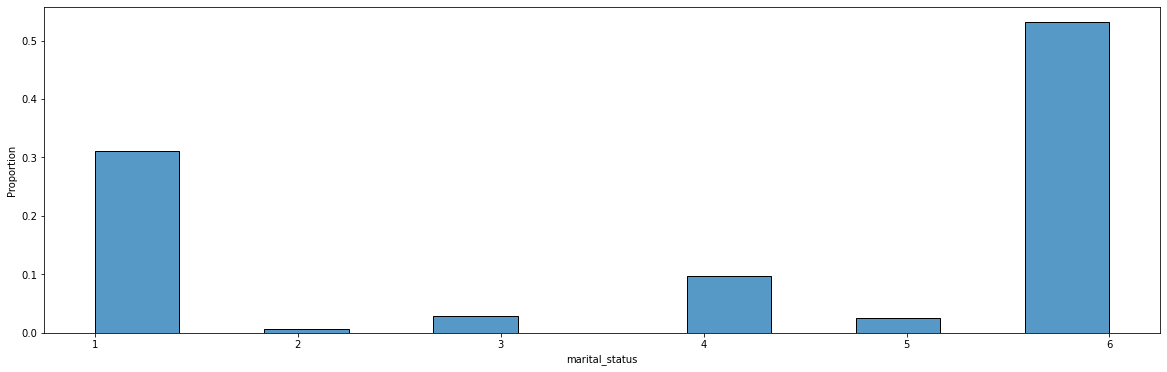

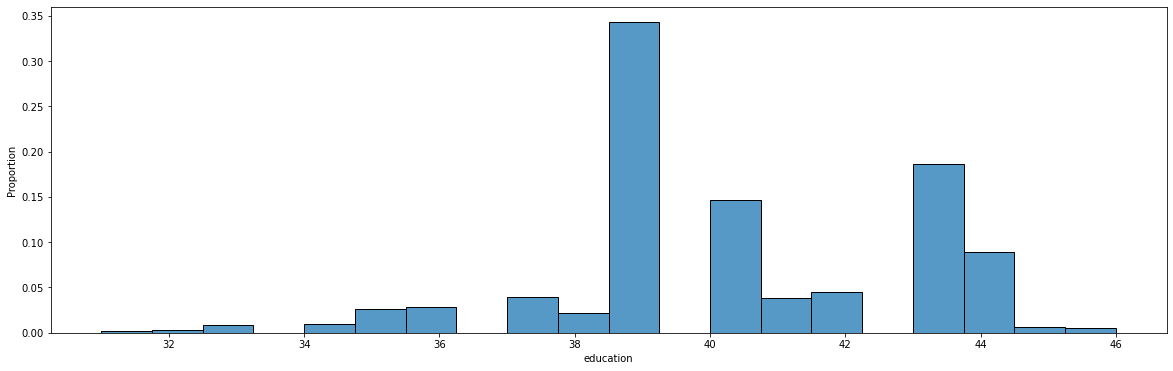

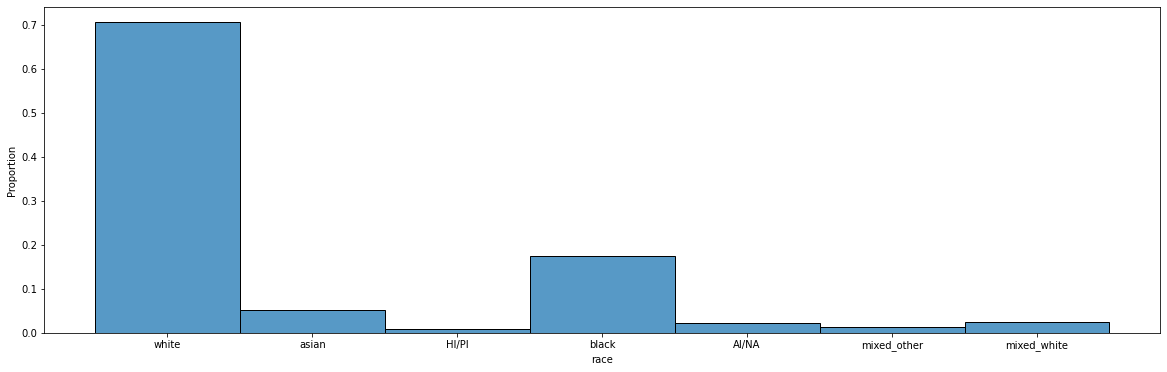

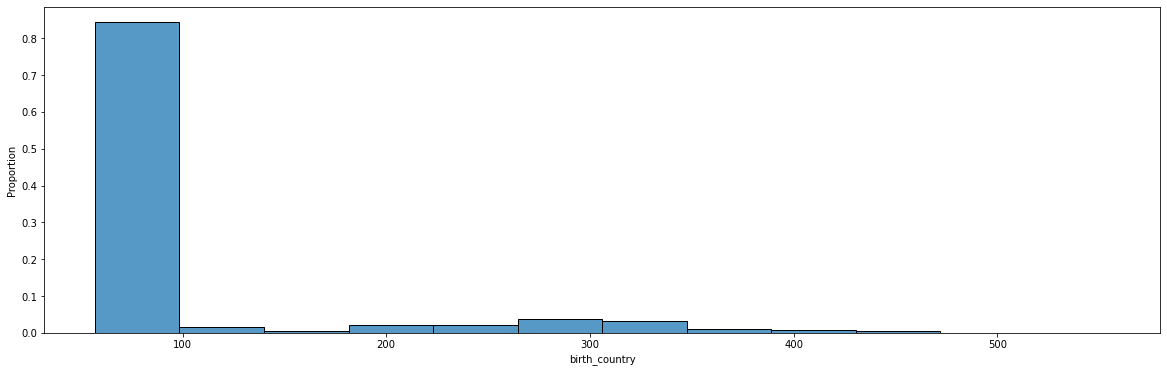

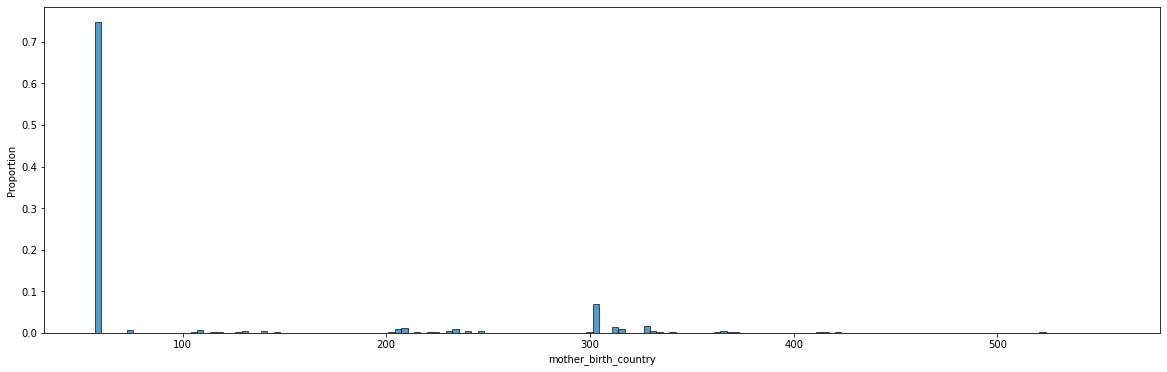

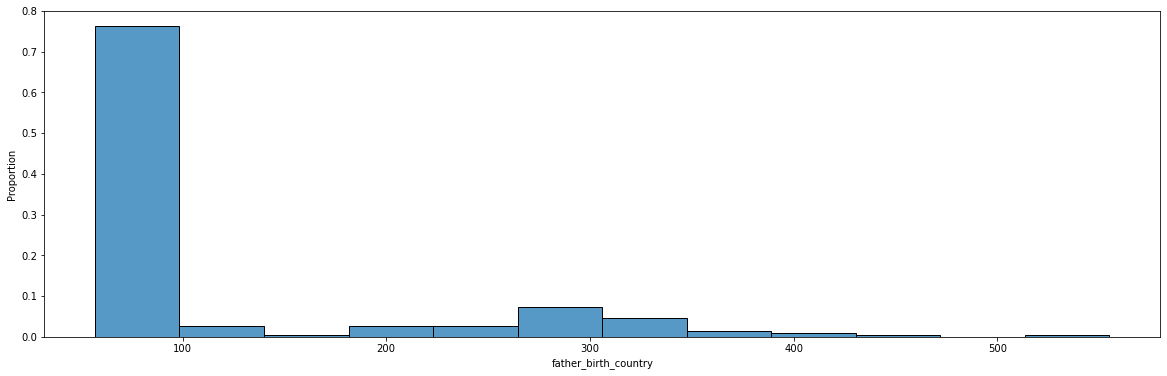

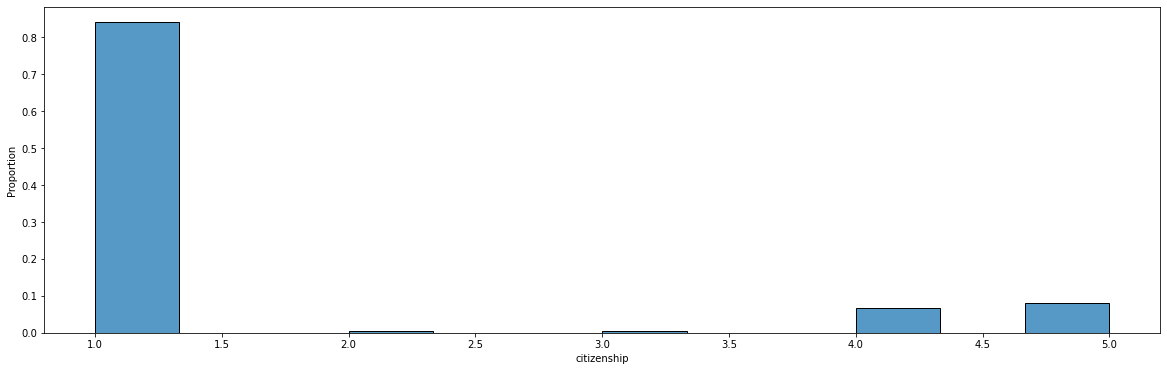

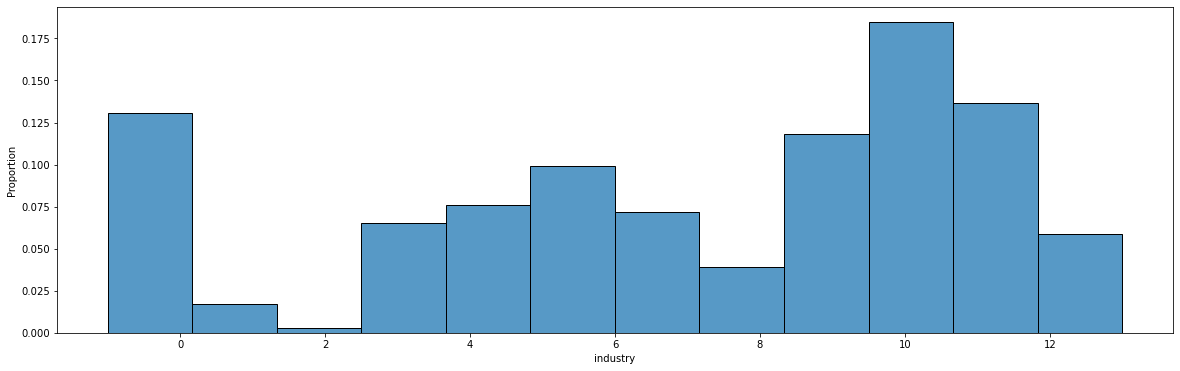

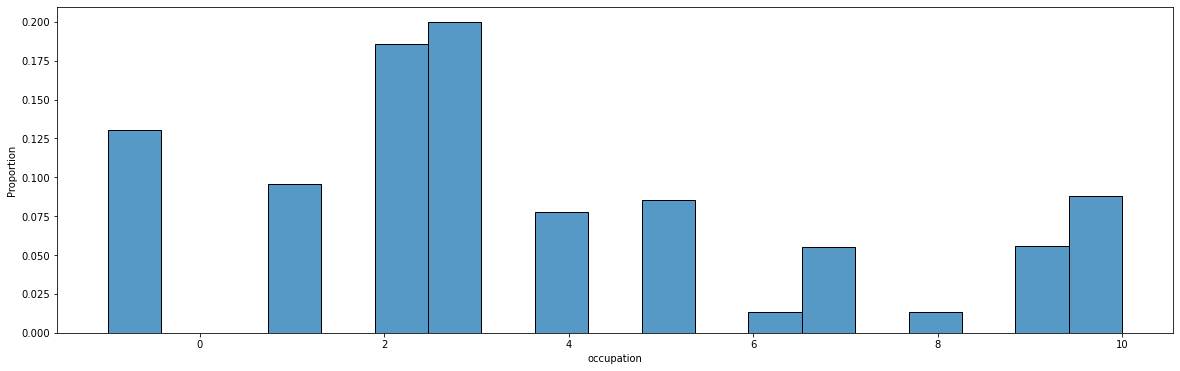

In [31]:
for col in unemployed[categorical_cols]:
    plt.figure(figsize=(20,6))
    sns.histplot(data=unemployed, x=col, multiple='dodge', stat='proportion')
    #plt.axhline(y=train.employed.mean(), color='red', linestyle='dashed', label='Employement Percentage')
    #plt.title(bivariate_takeaways[col])
    plt.show()

### Takeaways



### Home Value vs Everything

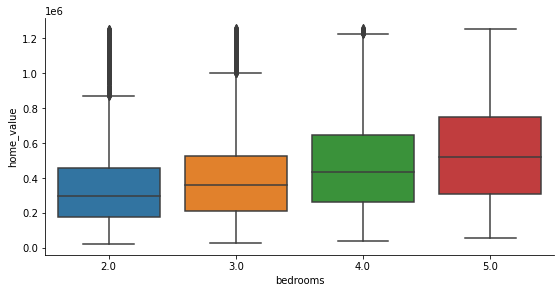

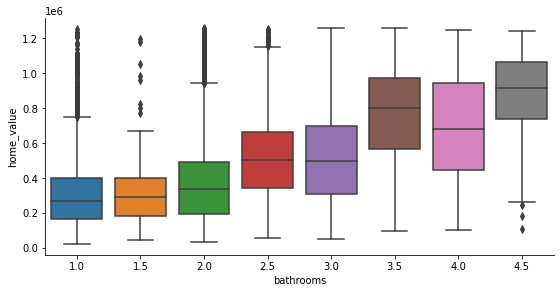

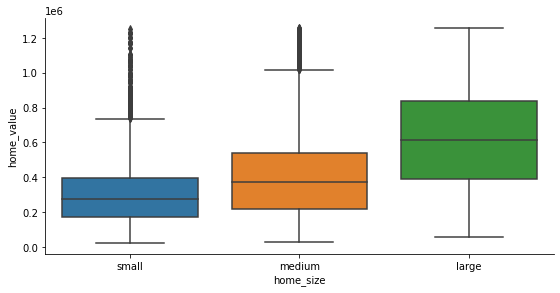

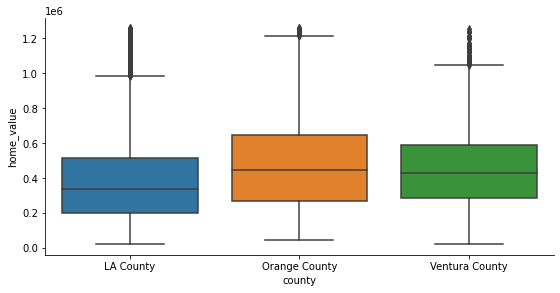

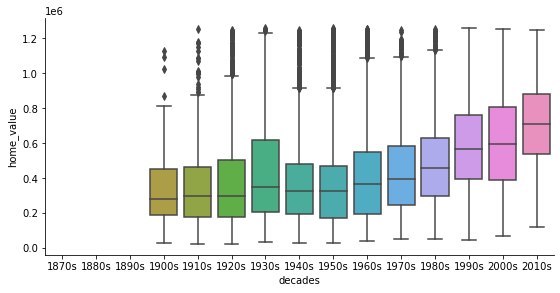

In [ ]:
for col in ['bedrooms', 'bathrooms', 'home_size', 'county', 'decades']:
    g = sns.PairGrid(data=train, 
                y_vars='home_value',
                x_vars=col, 
                height=4, 
                aspect=2)
    g.map(sns.boxplot)

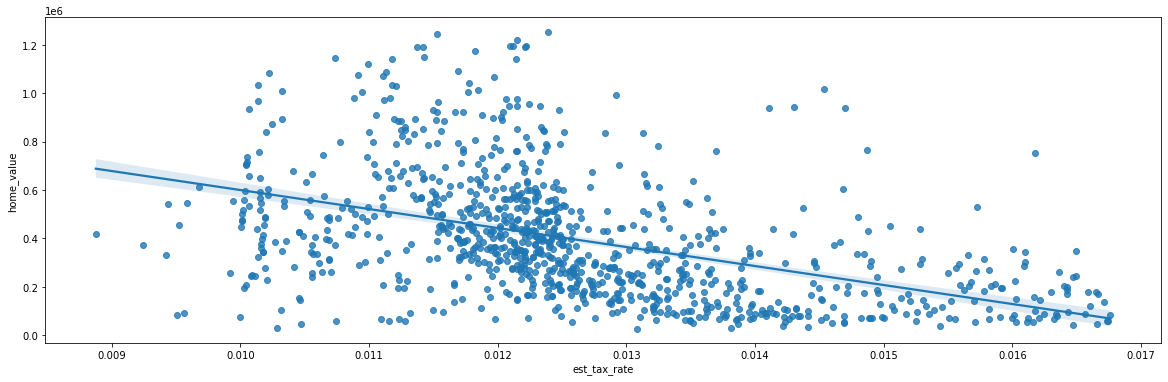

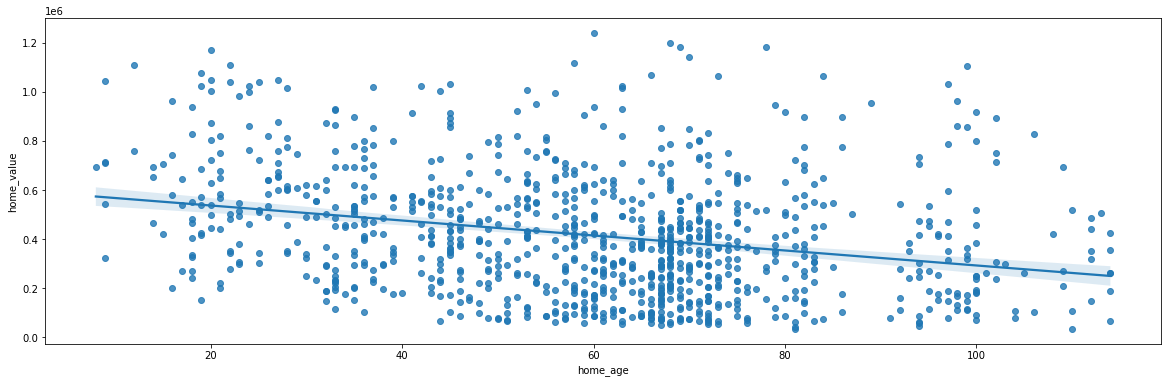

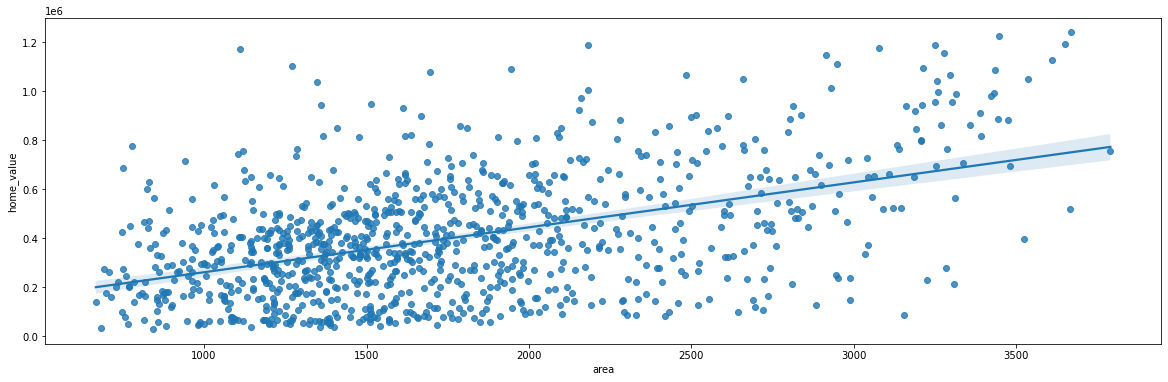

In [ ]:
for col in ['est_tax_rate', 'home_age', 'area']:
    plt.figure(figsize=(20,6))
    sns.regplot(data=train.sample(n=1000), y='home_value', x=col)
    plt.show()

### Takeaways
* Bedrooms, bathrooms, home_size/area and lower age support higher home values
* huge jump for value when going above 3 bathrooms
* No other major new takeaways

## Multivariate

### Home Value Vs Home Size Vs The Rest

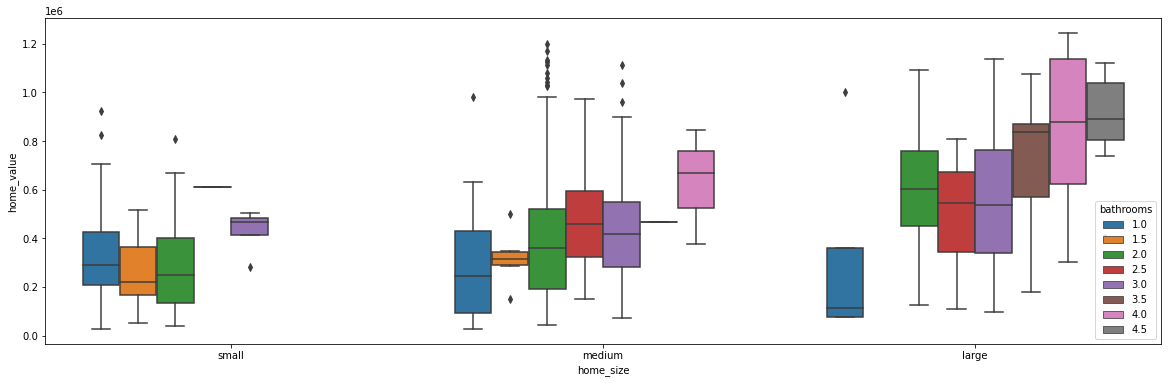

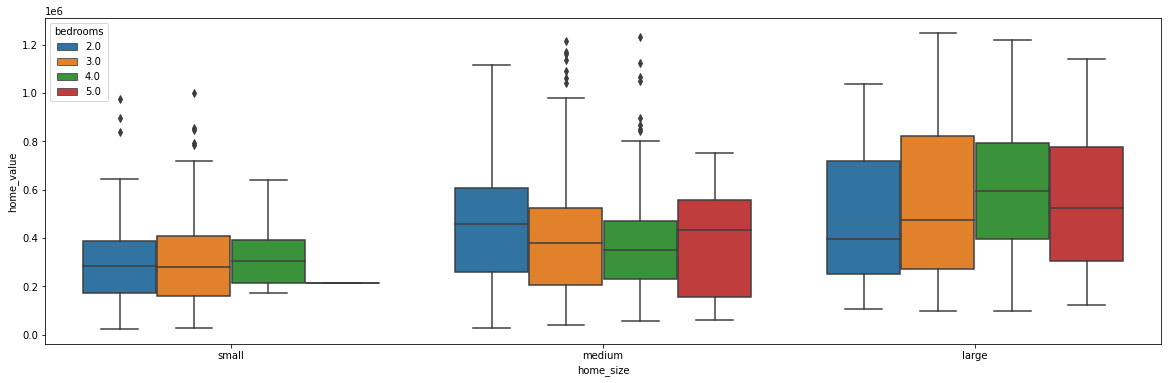

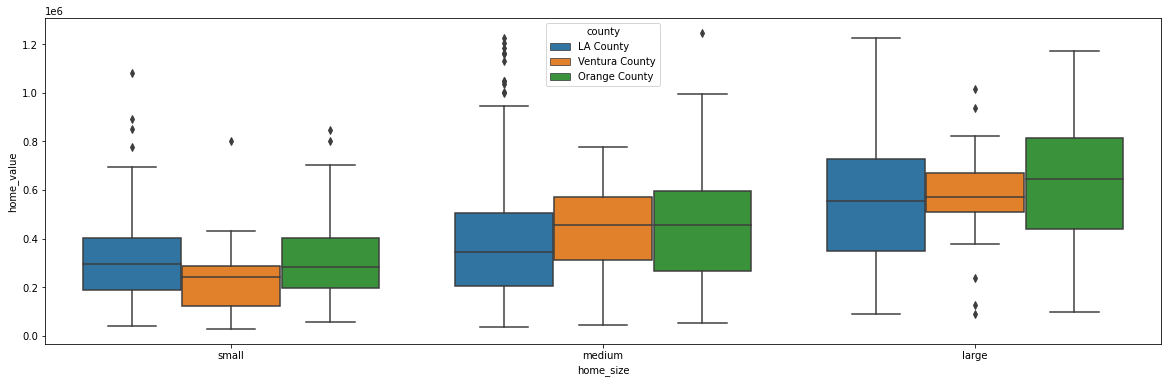

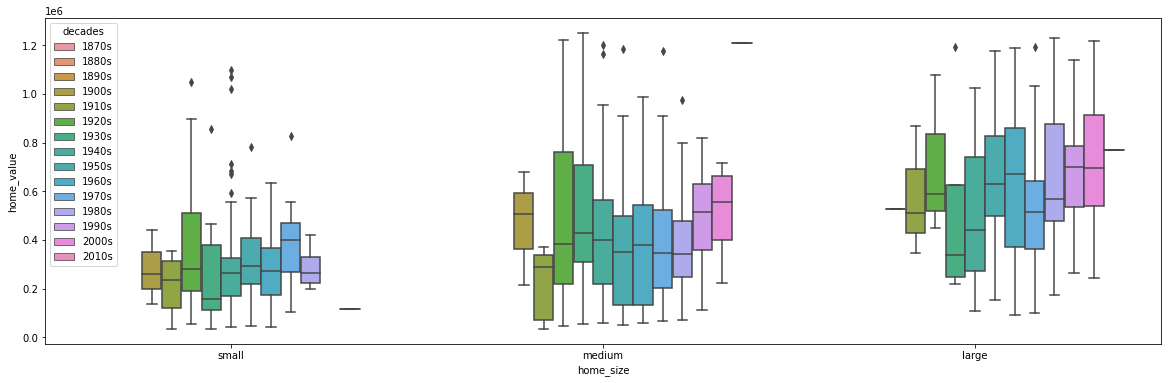

In [ ]:
#loop through columns to create visual comparing home values across differences in size groups 
for col in train[['bathrooms', 'bedrooms', 'county', 'decades']].columns:
    plt.figure(figsize=(20,6))
    sns.boxplot(data=train.sample(n=1000), x='home_size', y='home_value',
                hue=col) 
    plt.show()

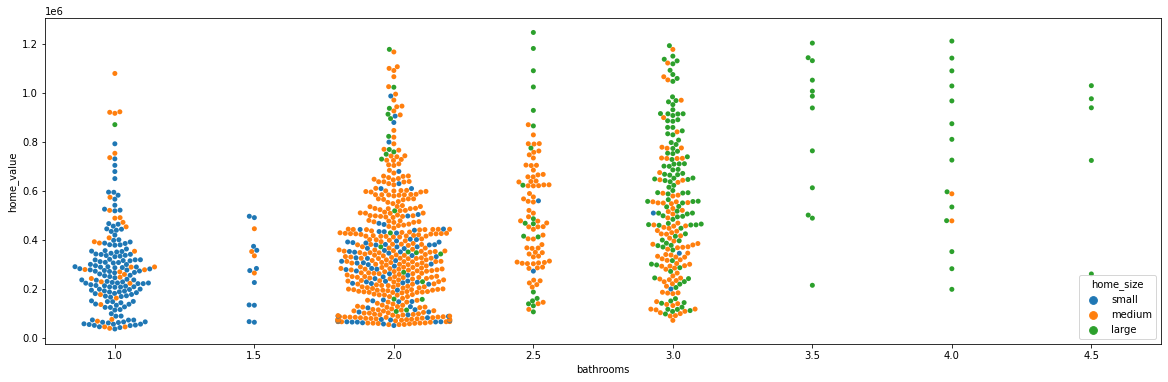

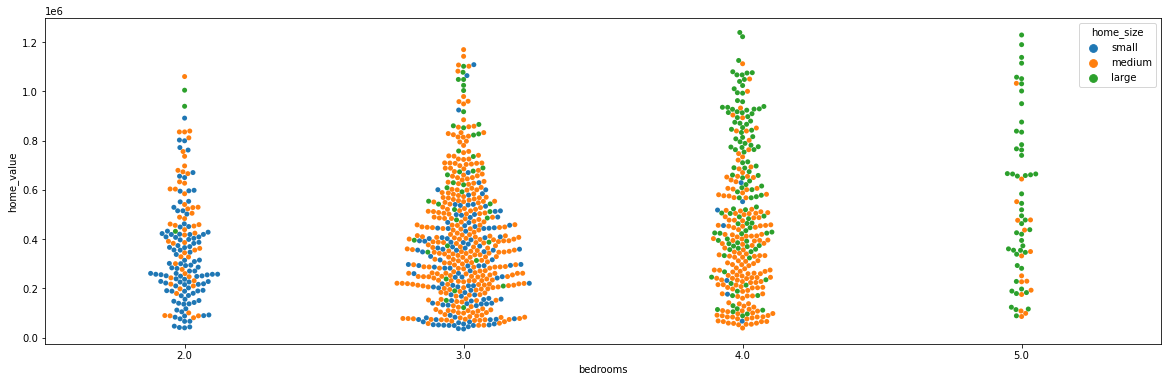

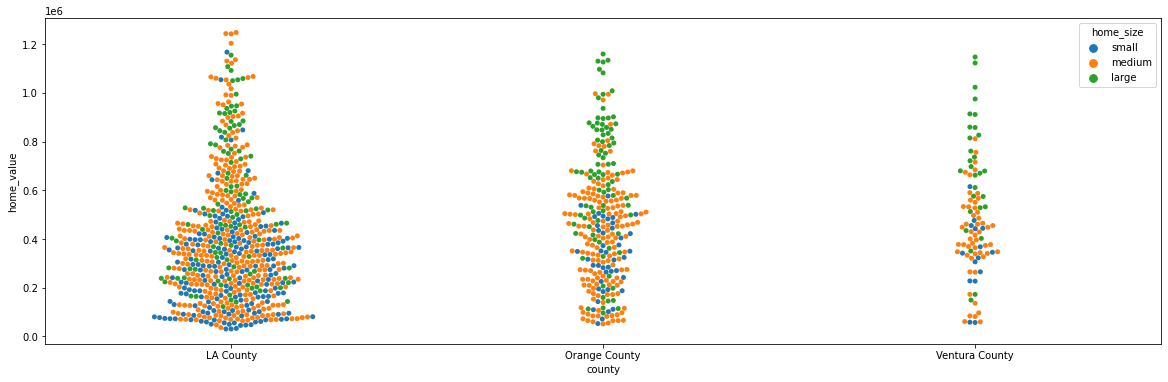

In [ ]:
#loop through columns to create visual comparing home values across differences in size groups 
for col in train[['bathrooms', 'bedrooms', 'county']].columns:
    plt.figure(figsize=(20,6))
    sns.swarmplot(data=train.sample(n=1000), x=col, y='home_value',
                hue='home_size') 
    plt.show()

<Figure size 1440x432 with 0 Axes>

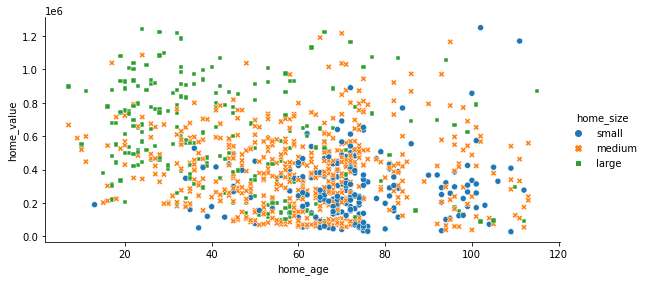

<Figure size 1440x432 with 0 Axes>

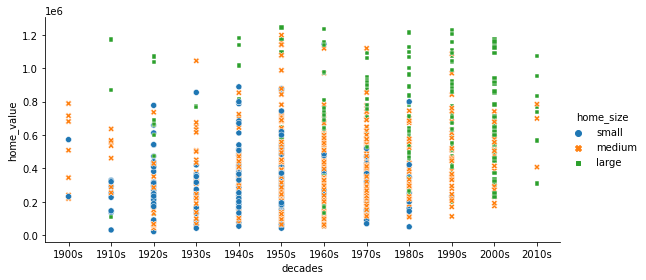

<Figure size 1440x432 with 0 Axes>

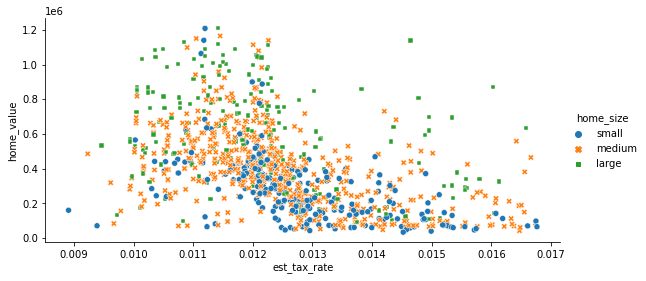

In [ ]:
for col in train[['home_age', 'decades', 'est_tax_rate']].columns:
    plt.figure(figsize=(20,6))
    sns.relplot(data=train.sample(n=1000), x=col, y='home_value',
                hue='home_size', style='home_size',
                height=4, aspect=2) 
    plt.show()

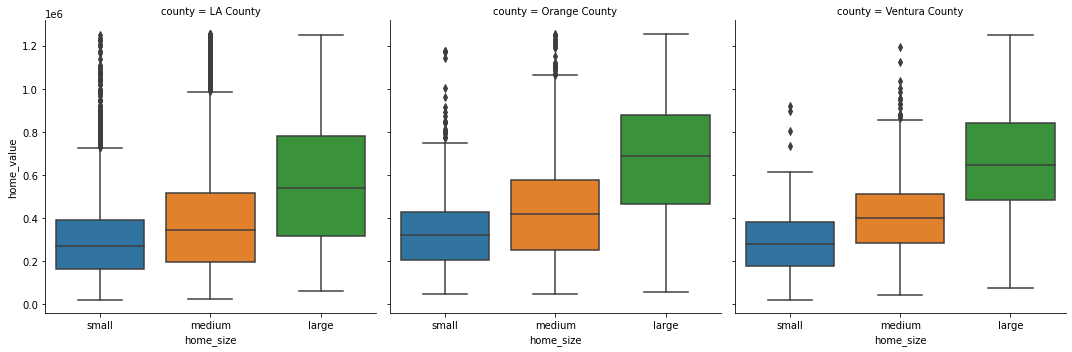

In [ ]:
sns.catplot(data=train, x='home_size', y='home_value', col='county', kind='box')

### Takeaways
* The value add of a larger home seems to be consistent rate across counties

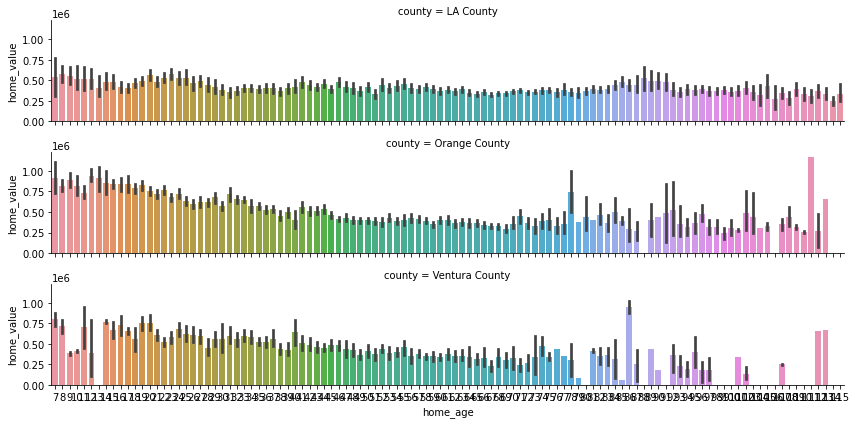

In [ ]:
sns.catplot(data=train, x='home_age', y='home_value', row='county', kind='bar', height=2, aspect=6)

## Takeaways
* Large homes less bedrooms are worth more

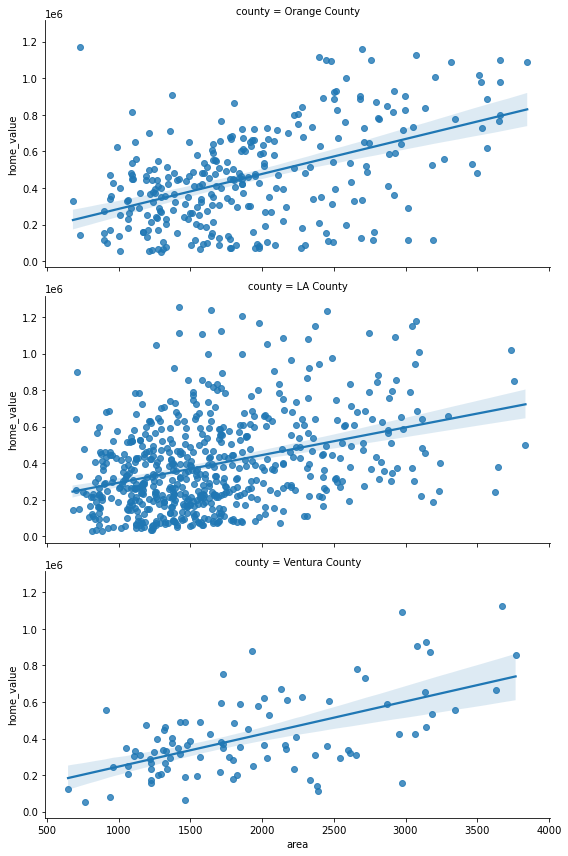

In [ ]:
#compare the relationship between home value and area across the different counties
sns.lmplot(data=train.sample(n=1000), x='area', y='home_value', row='county', height=4, aspect=2)

### Takeaways
* not very large discrepencies between the counties based on bathrooms or bedrooms.
* nothing very interesting here 

### Home Value Vs Home Age Vs The Rest

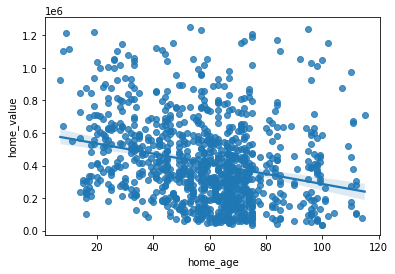

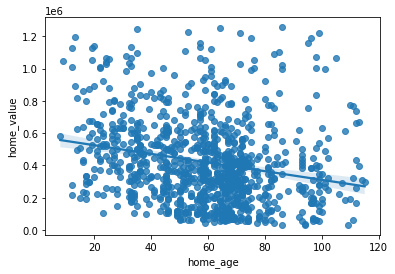

In [ ]:
for col in train[['bathrooms', 'bedrooms']].columns:
    sns.regplot(data=train.sample(n=1000), x='home_age', y='home_value',
                )
    plt.show()

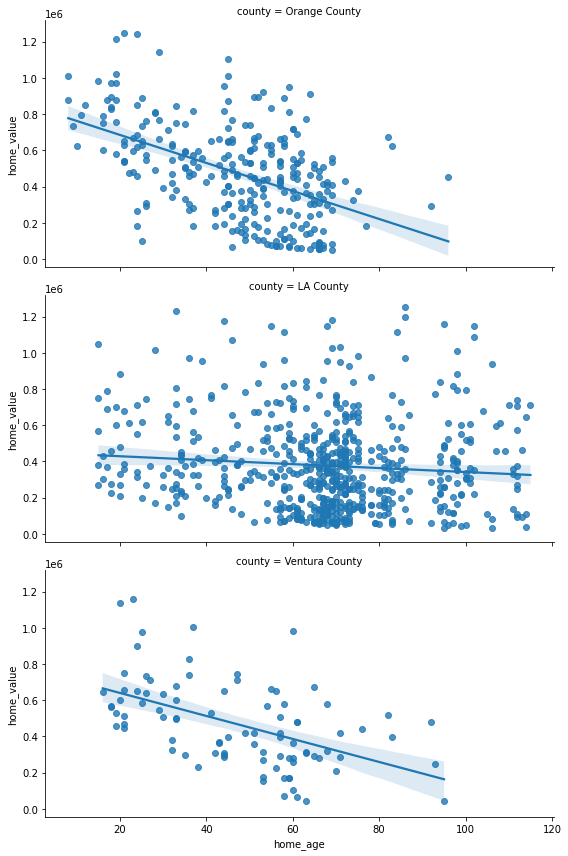

In [ ]:
sns.lmplot(data=train.sample(n=1000), x='home_age', y='home_value', row='county', height=4, aspect=2)

## Takeaways
* Newer Homes in LA County not seeing the same rise in value

### Home Value seperated by County Vs The Rest

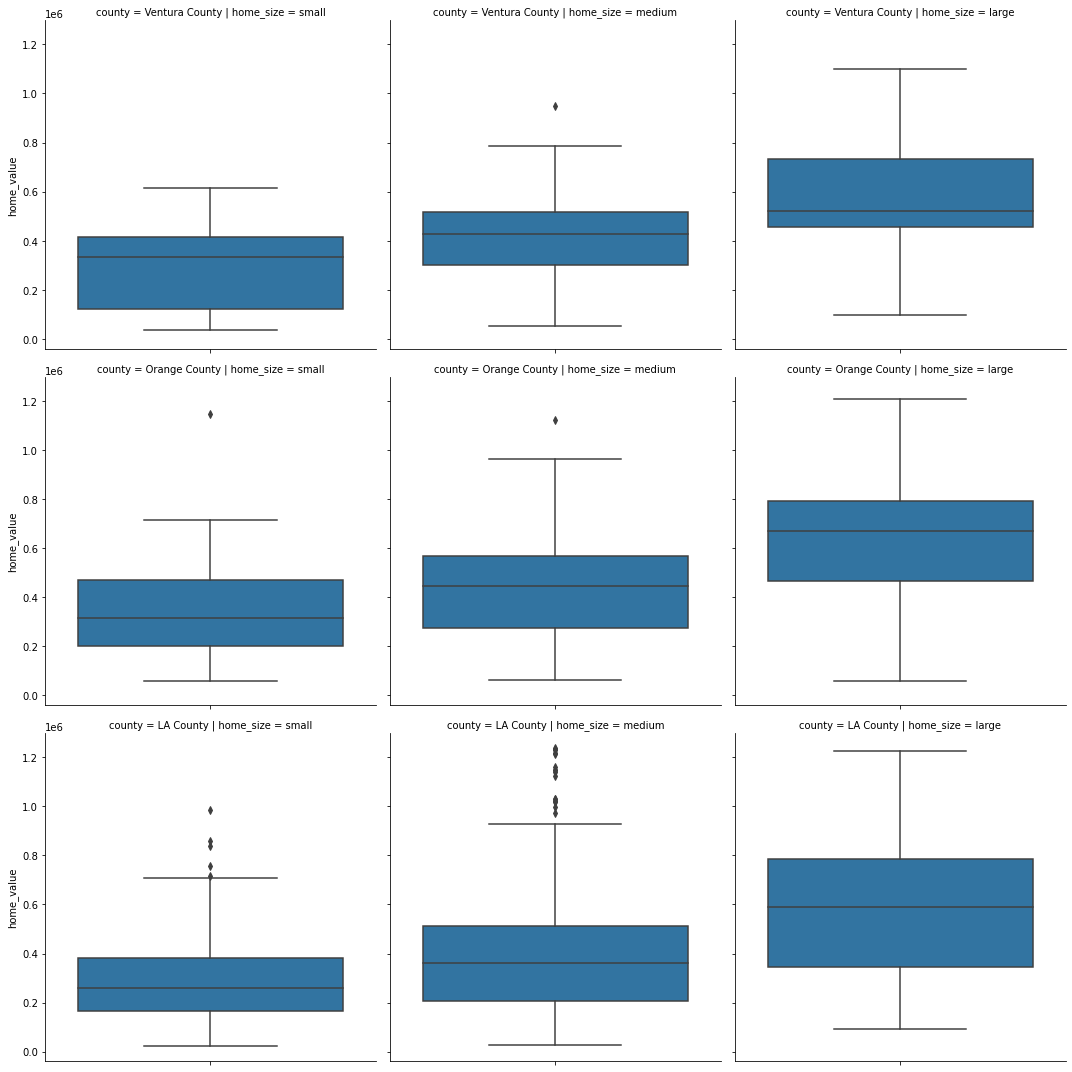

In [ ]:
sns.catplot(data=train.sample(n=1000), y='home_value', col='home_size', row='county', kind='box');

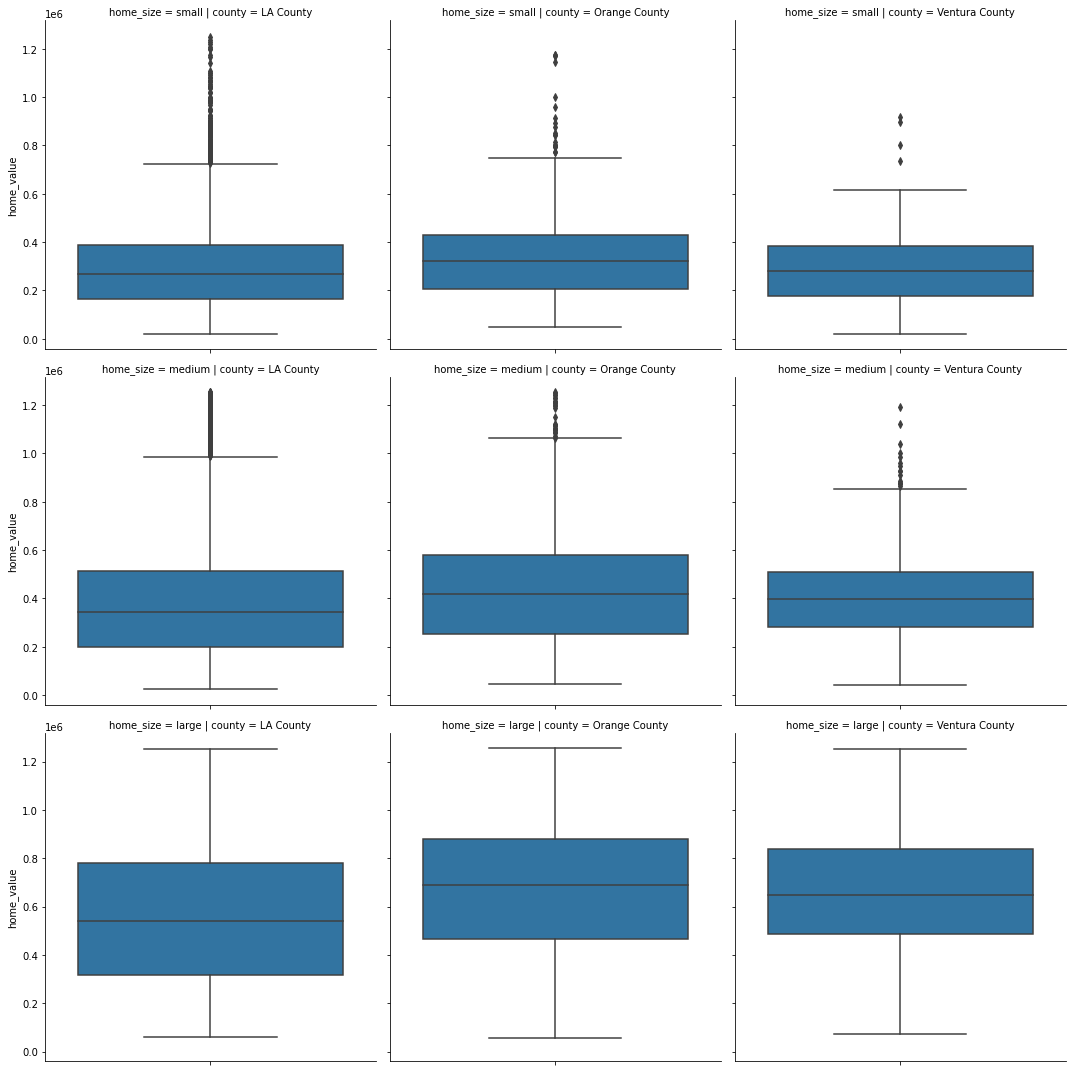

In [ ]:
sns.catplot(data=train, y='home_value', col='county', row='home_size', kind='box');

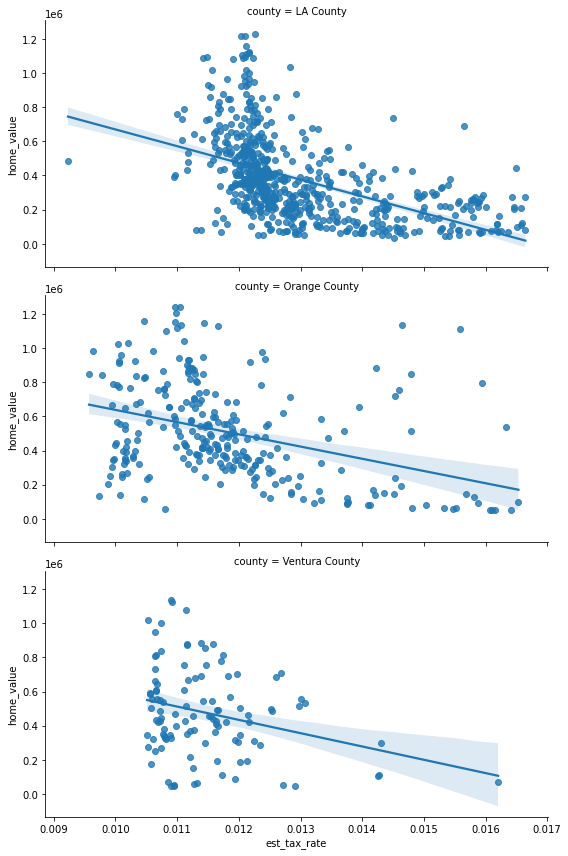

In [ ]:

sns.lmplot(data=train.sample(n=1000), x='est_tax_rate', y='home_value', row='county', height=4, aspect=2)

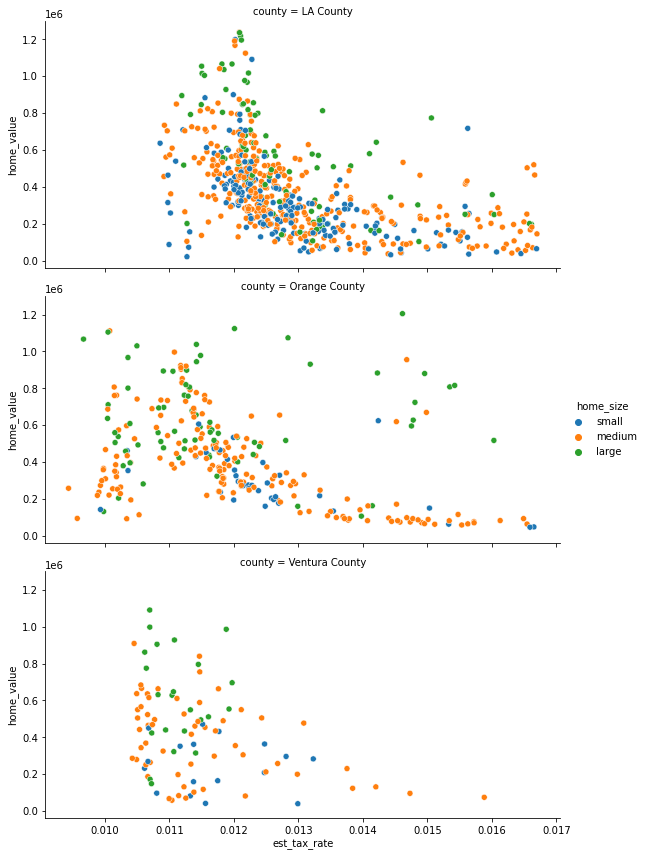

In [ ]:
# tax rate relationship holds across counties
sns.relplot(data=train.sample(n=1000), x='est_tax_rate', y='home_value', hue='home_size', row='county', height=4, aspect=2)

## Takeaways
* LA county larger effect of est_tax_rate on decrease in home values
* Ventura

## Specific Questions with plots and tests

### Question - Is there difference in median home value between counties?
${H_0}$: There is no significant difference in median home value between counties  
${H_a}$: There is significant difference in median home value between counties  
${\alpha}$: .05

> Result: There is enough evidence to reject our null hypothesis. **Test code below**

In [ ]:
round(train.groupby(by='county').home_value.mean().sort_values(ascending=False) ,2)

county
Orange County     473224.36
Ventura County    452303.54
LA County         384579.03
Name: home_value, dtype: float64

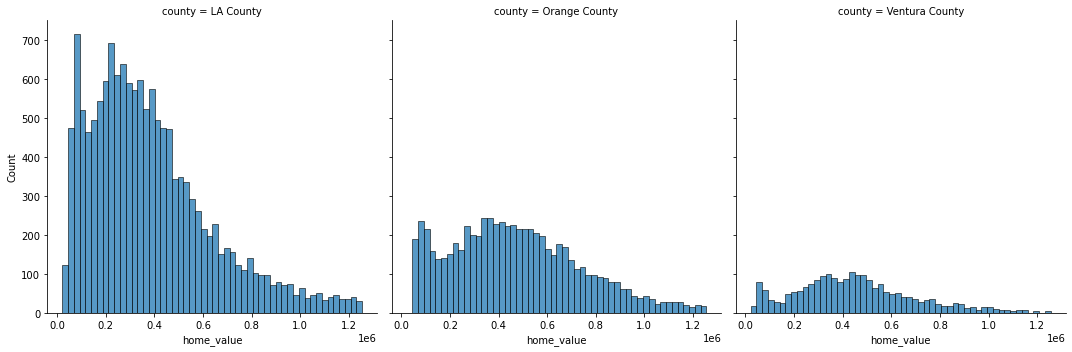

In [ ]:
#visualization first
sns.displot(data=train, x='home_value', col='county', kind='hist');

In [ ]:
#fips 6059 has highest mean value --> for variances what is the threshold for useability?
la_county = train[train.county == 'LA County'].home_value
orange_county = train[train.county == 'Orange County'].home_value
ventura_county = train[train.county == 'Ventura County'].home_value

alpha = .05
f, p = f_oneway(la_county, orange_county, ventura_county)

print (f'ANOVA test statistic value: {f}')
print (f'p-value : {p}')

if p > alpha:
    print(f'Fail to reject the null hypothesis, because our p-value is greater than our alpha.')
else: 
    print(f'There is enough evidence to reject our null hypothesis')

ANOVA test statistic value: 296.5808060407762
p-value : 6.552208990337671e-128
There is enough evidence to reject our null hypothesis


### Question -  Why do some properties have a much higher value than others when they are located so close to each other? 

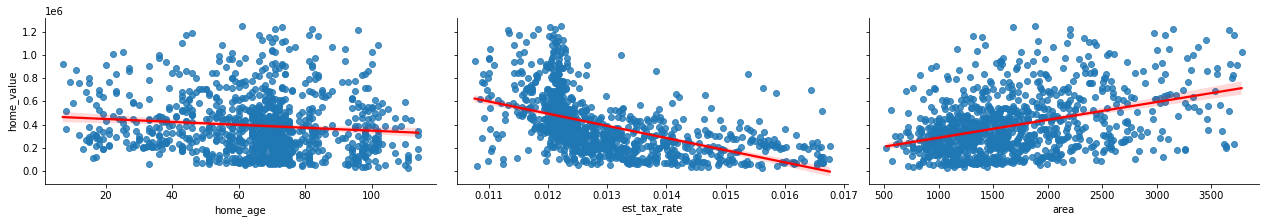

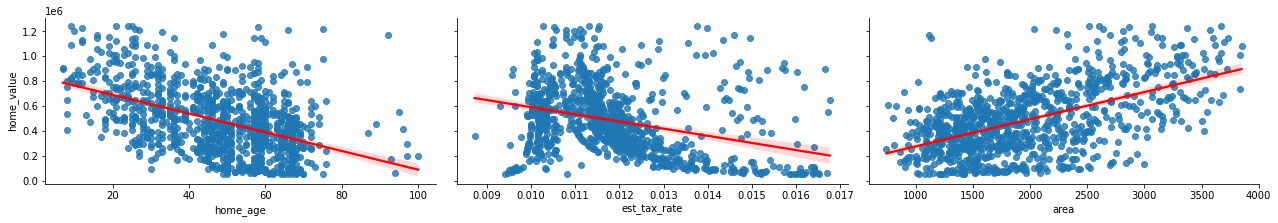

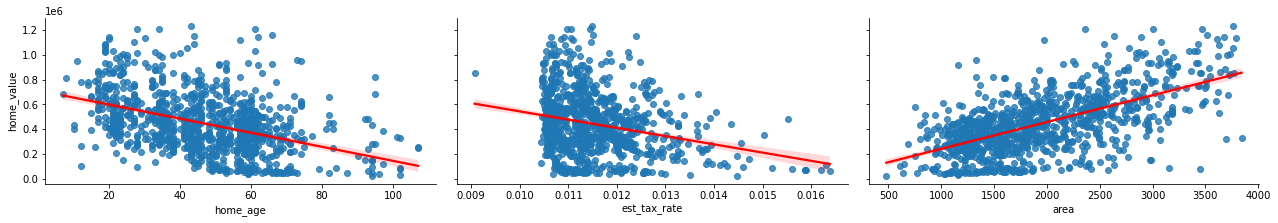

In [ ]:
for county in ['LA County', 'Orange County', 'Ventura County']:
    g = sns.PairGrid(data=train[train.county == county].sample(n=1000),
                    y_vars='home_value', x_vars=['home_age', 'est_tax_rate', 'area'],
                    height=3, aspect=2)
    g.map(sns.regplot, line_kws={'color':'r'}, label=county)

In [ ]:
alpha = .05
for col in ['home_age', 'est_tax_rate', 'area']:
    r, p = pearsonr(train[col], train.home_value)
    if p > alpha:
        result = 'Fail to reject the null hypothesis, because our p-value is greater than our alpha.'
    else: 
        result = 'There is enough evidence to reject our null hypothesis'

    print(f""" 
    H_0: There is no relationship between median home value and {col}
    H_a: There is a relationship between median home value and {col}
    alpha: .05
    Pearson r value: {r}
    p-value : {p}
    {result}
    -----""")

 
    H_0: There is no relationship between median home value and home_age
    H_a: There is a relationship between median home value and home_age
    alpha: .05
    Pearson r value: -0.251367782193178
    p-value : 0.0
    There is enough evidence to reject our null hypothesis
    -----
 
    H_0: There is no relationship between median home value and est_tax_rate
    H_a: There is a relationship between median home value and est_tax_rate
    alpha: .05
    Pearson r value: -0.4692591801779151
    p-value : 0.0
    There is enough evidence to reject our null hypothesis
    -----
 
    H_0: There is no relationship between median home value and area
    H_a: There is a relationship between median home value and area
    alpha: .05
    Pearson r value: 0.46319756420051295
    p-value : 0.0
    There is enough evidence to reject our null hypothesis
    -----


In [ ]:
# area has a high correlation with property value
alpha = .05
for county in ['LA County', 'Orange County', 'Ventura County']:
    print(f'In {county}:')
    for col in ['home_age', 'est_tax_rate', 'area']:
        r, p = pearsonr(train[train.county == county][col], train[train.county == county].home_value)
        if p > alpha:
            result = 'Fail to reject the null hypothesis, because our p-value is greater than our alpha.'
        else: 
            result = 'There is enough evidence to reject our null hypothesis'

        print(f""" 
        H_0: There is no relationship between median home value and {col}
        H_a: There is a relationship between median home value and {col}
        alpha: .05
        Pearson r value: {r}
        p-value : {p}
        {result}
        -----""")

In LA County:
 
        H_0: There is no relationship between median home value and home_age
        H_a: There is a relationship between median home value and home_age
        alpha: .05
        Pearson r value: -0.08466487313626364
        p-value : 3.2328506334010425e-24
        There is enough evidence to reject our null hypothesis
        -----
 
        H_0: There is no relationship between median home value and est_tax_rate
        H_a: There is a relationship between median home value and est_tax_rate
        alpha: .05
        Pearson r value: -0.5209255495897032
        p-value : 0.0
        There is enough evidence to reject our null hypothesis
        -----
 
        H_0: There is no relationship between median home value and area
        H_a: There is a relationship between median home value and area
        alpha: .05
        Pearson r value: 0.3817707752076994
        p-value : 0.0
        There is enough evidence to reject our null hypothesis
        -----
In Orange Cou

### Question -  Why are some properties valued so differently from others when they have nearly the same physical attributes but only differ in location?



In [ ]:
round(train.groupby(by='county').est_tax_rate.mean().sort_values(ascending=False) ,3)

county
LA County         0.013
Orange County     0.012
Ventura County    0.011
Name: est_tax_rate, dtype: float64

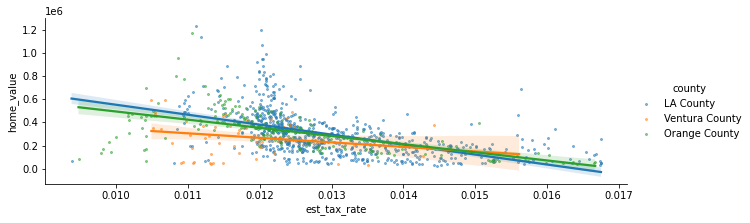

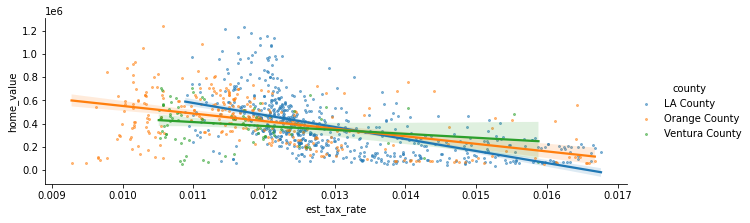

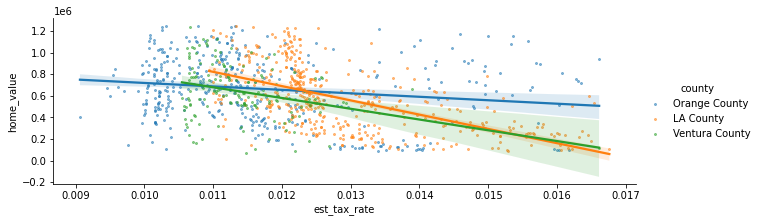

In [ ]:
for size in ['small', 'medium', 'large']:
    g = sns.PairGrid(data=train[train.home_size == size].sample(n=1000),
                    y_vars='home_value', x_vars=['est_tax_rate'],
                    hue='county', height=3, aspect=3)
    g.map(sns.regplot, scatter_kws = {'alpha': 0.5,'s':4})
    g.add_legend()

In [ ]:
# area has a high correlation with property value
alpha = .05
for size in ['small', 'medium', 'large']:
    print(f'In {size}:')
    r, p = pearsonr(train[train.home_size == size]['est_tax_rate'], train[train.home_size == size].home_value)
    if p > alpha:
        result = 'Fail to reject the null hypothesis, because our p-value is greater than our alpha.'
    else: 
        result = 'There is enough evidence to reject our null hypothesis'

    print(f""" 
    H_0: There is no relationship between median home value and {col}
    H_a: There is a relationship between median home value and {col}
    alpha: .05
    Pearson r value: {r}
    p-value : {p}
    {result}
    -----""")

In small:
 
    H_0: There is no relationship between median home value and area
    H_a: There is a relationship between median home value and area
    alpha: .05
    Pearson r value: -0.495171052696178
    p-value : 0.0
    There is enough evidence to reject our null hypothesis
    -----
In medium:
 
    H_0: There is no relationship between median home value and area
    H_a: There is a relationship between median home value and area
    alpha: .05
    Pearson r value: -0.49317912485896725
    p-value : 0.0
    There is enough evidence to reject our null hypothesis
    -----
In large:
 
    H_0: There is no relationship between median home value and area
    H_a: There is a relationship between median home value and area
    alpha: .05
    Pearson r value: -0.36722405188931806
    p-value : 3.824945187982036e-148
    There is enough evidence to reject our null hypothesis
    -----


### Question - Is having one bathroom worse than having two bedrooms?


In [ ]:
#create series containing the home values of the subgroups in question
one_bathroom = train[train.bathrooms == 1].home_value
two_bedrooms = train[train.bedrooms == 2].home_value

In [ ]:
print(f'Mean home value of homes with one bathroom: {round(one_bathroom.mean(),2)}\n\
Mean home value of homes with two bedrooms: {round(two_bedrooms.mean(),2)}')

Mean home value of homes with one bathroom: 301604.7
Mean home value of homes with two bedrooms: 343753.04


In [ ]:
#set alpha
alpha = .05

#perform levene tets
l, p = levene(one_bathroom, two_bedrooms)

print (f'Levene test statistic value: {f}')
print (f'p-value : {p}')

#check p against alpha
if p > alpha:
    print(f'Fail to reject the null hypothesis, because our p-value is greater than our alpha.')
else: 
    print(f'There is enough evidence to reject our null hypothesis')

Levene test statistic value: 296.5808060407762
p-value : 2.1705383432926296e-15
There is enough evidence to reject our null hypothesis


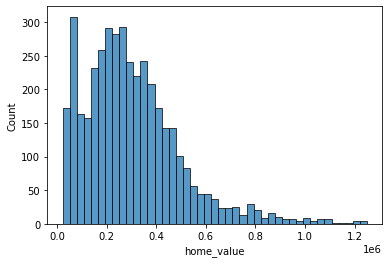

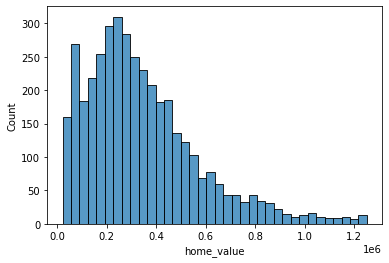

In [ ]:
sns.histplot(one_bathroom);

plt.show()

sns.histplot(two_bedrooms);


#### Statistical Testing
${H_0}$: The mean home value of homes with 1 bathroom is equal or greater than those with 2 bedrooms  
${H_a}$: The mean home value of homes with 1 bathroom is less than those with 2 bedrooms   
${\alpha}$: .05

> Result: There is enough evidence to reject our null hypothesis. **Test code below**

In [ ]:
alpha = .05
t, p = ttest_ind(one_bathroom, two_bedrooms, equal_var=False)

print (f't test statistic value: {f}')
print (f'p-value : {p}')

if p > alpha:
    print(f'Fail to reject the null hypothesis, because our p-value is greater than our alpha.')
else: 
    print(f'There is enough evidence to reject our null hypothesis')

t test statistic value: 296.5808060407762
p-value : 1.35684620954748e-18
There is enough evidence to reject our null hypothesis
